# Analyse Pre sources

 work with Weakly_2023_44
- use jupyter kernel LSST


- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab
- creation date : 2023/12/26
- update : 2023/12/26


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm,SymLogNorm


import matplotlib.ticker                         # here's where the formatter is
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from astropy.visualization import (MinMaxInterval, SqrtStretch,ZScaleInterval,PercentileInterval,
                                   ImageNormalize,imshow_norm)
from astropy.visualization.stretch import SinhStretch, LinearStretch,AsinhStretch,LogStretch
from astropy.io import fits
import astropy.coordinates as coord
import astropy.units as u
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (4,3)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [2]:
filesource_in="preSourceTable_202312.csv"

In [3]:
df = pd.read_csv(filesource_in)

In [4]:
df

,sourceId,coord_ra,coord_dec,ccdVisitId,parentSourceId,x,y,xErr,yErr,ra,...,hsmShapeRegauss_flag_parent_source,sky_source,detect_isPrimary,visit,detector,band,physical_filter,visid_idx,dateobs,mjd
0,174092471737778177,240.035971,-24.102006,41506879744,0,971.000000,18.000000,NaN,NaN,240.035971,...,False,False,True,2023072000185,0,i,SDSSi_65mm~empty,0,2023-07-21 01:18:49.927,60146.054745
1,174092471737778178,240.114481,-24.101061,41506879744,0,3668.000000,18.000000,NaN,NaN,240.114481,...,False,False,True,2023072000185,0,i,SDSSi_65mm~empty,0,2023-07-21 01:18:49.927,60146.054745
2,174092471737778179,240.050174,-24.100808,41506879744,0,1459.423140,56.758008,0.218000,0.190530,240.050174,...,False,False,True,2023072000185,0,i,SDSSi_65mm~empty,0,2023-07-21 01:18:49.927,60146.054745
3,174092471737778180,240.056853,-24.100218,41506879744,0,1689.114439,75.950081,0.339048,0.381324,240.056853,...,False,False,True,2023072000185,0,i,SDSSi_65mm~empty,0,2023-07-21 01:18:49.927,60146.054745
4,174092471737778181,240.095234,-24.099785,41506879744,0,3007.604922,74.842679,0.366987,0.293205,240.095234,...,False,False,True,2023072000185,0,i,SDSSi_65mm~empty,0,2023-07-21 01:18:49.927,60146.054745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520356,176062681684379028,270.263921,-24.926754,41976614400,176062681684378458,2429.000000,3974.000000,NaN,NaN,270.263921,...,False,False,True,2023091400078,0,r,SDSSr_65mm~empty,2098,2023-09-15 02:31:54.880,60202.105496
1520357,176062681684379029,270.283762,-24.926415,41976614400,176062681684378462,3106.123501,3978.180182,1.095420,2.527355,270.283762,...,False,False,True,2023091400078,0,r,SDSSr_65mm~empty,2098,2023-09-15 02:31:54.880,60202.105496
1520358,176062681684379030,270.282676,-24.926566,41976614400,176062681684378462,3069.000000,3973.000000,NaN,NaN,270.282676,...,False,False,True,2023091400078,0,r,SDSSr_65mm~empty,2098,2023-09-15 02:31:54.880,60202.105496
1520359,176062681684379031,270.309986,-24.926115,41976614400,176062681684378465,4001.000000,3978.000000,NaN,NaN,270.309986,...,False,False,True,2023091400078,0,r,SDSSr_65mm~empty,2098,2023-09-15 02:31:54.880,60202.105496


In [5]:
colnames = list(df.columns)
for name in colnames:
    print(name)

sourceId
coord_ra
coord_dec
ccdVisitId
parentSourceId
x
y
xErr
yErr
ra
dec
decl
raErr
decErr
ra_dec_Cov
calibFlux
calibFluxErr
ap03Flux
ap03FluxErr
ap03Flux_flag
ap06Flux
ap06FluxErr
ap06Flux_flag
ap09Flux
ap09FluxErr
ap09Flux_flag
ap12Flux
ap12FluxErr
ap12Flux_flag
ap17Flux
ap17FluxErr
ap17Flux_flag
ap25Flux
ap25FluxErr
ap25Flux_flag
ap35Flux
ap35FluxErr
ap35Flux_flag
ap50Flux
ap50FluxErr
ap50Flux_flag
ap70Flux
ap70FluxErr
ap70Flux_flag
sky
skyErr
psfFlux
psfFluxErr
ixx
iyy
ixy
ixxPSF
iyyPSF
ixyPSF
ixxDebiasedPSF
iyyDebiasedPSF
ixyDebiasedPSF
gaussianFlux
gaussianFluxErr
extendedness
localPhotoCalib
localPhotoCalib_flag
localPhotoCalibErr
localWcs_flag
localWcs_CDMatrix_2_1
localWcs_CDMatrix_1_1
localWcs_CDMatrix_1_2
localWcs_CDMatrix_2_2
blendedness_abs
blendedness_flag
blendedness_flag_noCentroid
blendedness_flag_noShape
apFlux_12_0_flag
apFlux_12_0_flag_apertureTruncated
apFlux_12_0_flag_sincCoeffsTruncated
apFlux_12_0_instFlux
apFlux_12_0_instFluxErr
apFlux_17_0_flag
apFlux_17_0_i

In [6]:
df_sel = df[['sourceId','ccdVisitId','x','y','ra','dec','coord_ra','coord_dec','psfFlux','gaussianFlux','visit','band','visid_idx','mjd','dateobs','extendedness_flag','detect_isPrimary']]

In [7]:
def convert_fluxtomag(x) :
    """
    The object and source catalogs store only fluxes. There are hundreds of flux-related columns, 
    and to store them also as magnitudes would be redundant, and a waste of space.
    All flux units are nanojanskys. The AB Magnitudes Wikipedia page provides a concise resource 
    for users unfamiliar with AB magnitudes and jansky fluxes. To convert to AB magnitudes use:
    As demonstrated in Section 2.3.2, to add columns of magnitudes after retrieving columns of flux, users can do this:
    results_table['r_calibMag'] = -2.50 * numpy.log10(results_table['r_calibFlux']) + 31.4
    results_table['r_cModelMag'] = -2.50 * numpy.log10(results_table['r_cModelFlux']) + 31.4
    (from DP0 tutorial)
    """
    return -2.50 * np.log10(x) + 31.4

In [8]:
df_sel["psfMag"] =  df_sel['psfFlux'].map(convert_fluxtomag)
#df_sel["gaussianMag"] =  df_sel['gaussianFlux'].map(lambda x:-2.50 * np.log10(x) + 31.4)
df_sel["gaussianMag"] =  df_sel['gaussianFlux'].map(convert_fluxtomag)

/tmp/ipykernel_38698/4088867659.py:12: RuntimeWarning: invalid value encountered in log10
  return -2.50 * np.log10(x) + 31.4
/tmp/ipykernel_38698/1754447433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sel["psfMag"] =  df_sel['psfFlux'].map(convert_fluxtomag)
/tmp/ipykernel_38698/4088867659.py:12: RuntimeWarning: invalid value encountered in log10
  return -2.50 * np.log10(x) + 31.4
/tmp/ipykernel_38698/4088867659.py:12: RuntimeWarning: divide by zero encountered in log10
  return -2.50 * np.log10(x) + 31.4
/tmp/ipykernel_38698/1754447433.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [9]:
df_sel = df_sel[df_sel['extendedness_flag']==False & df_sel['detect_isPrimary']]

In [10]:
df_sel.dropna(axis=0,inplace = True)

In [11]:
df_sel

,sourceId,ccdVisitId,x,y,ra,dec,coord_ra,coord_dec,psfFlux,gaussianFlux,visit,band,visid_idx,mjd,dateobs,extendedness_flag,detect_isPrimary,psfMag,gaussianMag
2,174092471737778179,41506879744,1459.423140,56.758008,240.050174,-24.100808,240.050174,-24.100808,1.199960e+06,1.232448e+06,2023072000185,i,0,60146.054745,2023-07-21 01:18:49.927,False,True,16.202083,16.173079
3,174092471737778180,41506879744,1689.114439,75.950081,240.056853,-24.100218,240.056853,-24.100218,3.211502e+05,3.671762e+05,2023072000185,i,0,60146.054745,2023-07-21 01:18:49.927,False,True,17.633229,17.487814
4,174092471737778181,41506879744,3007.604922,74.842679,240.095234,-24.099785,240.095234,-24.099785,6.535161e+05,6.485894e+05,2023072000185,i,0,60146.054745,2023-07-21 01:18:49.927,False,True,16.861859,16.870075
5,174092471737778182,41506879744,1067.365729,85.899514,240.038750,-24.100168,240.038750,-24.100168,2.687373e+05,2.940699e+05,2023072000185,i,0,60146.054745,2023-07-21 01:18:49.927,False,True,17.826680,17.728874
6,174092471737778183,41506879744,1015.704829,101.648672,240.037240,-24.099767,240.037240,-24.099767,1.462395e+05,1.497408e+05,2023072000185,i,0,60146.054745,2023-07-21 01:18:49.927,False,True,18.487338,18.461650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520349,176062681684379021,41976614400,1721.220185,3900.456386,270.243207,-24.928944,270.243207,-24.928944,5.797227e+05,5.812273e+05,2023091400078,r,2098,60202.105496,2023-09-15 02:31:54.880,False,True,16.991949,16.989135
1520350,176062681684379022,41976614400,1734.660929,3941.651923,270.243586,-24.927845,270.243586,-24.927845,2.781668e+05,2.709826e+05,2023091400078,r,2098,60202.105496,2023-09-15 02:31:54.880,False,True,17.789237,17.817647
1520351,176062681684379023,41976614400,1612.620766,3897.192739,270.240025,-24.929067,270.240025,-24.929067,2.301183e+05,2.213865e+05,2023091400078,r,2098,60202.105496,2023-09-15 02:31:54.880,False,True,17.995122,18.037122
1520353,176062681684379025,41976614400,1274.442138,3912.159875,270.230110,-24.928780,270.230110,-24.928780,4.203320e+05,6.785856e+05,2023091400078,r,2098,60202.105496,2023-09-15 02:31:54.880,False,True,17.341019,16.820988


<Axes: xlabel='x', ylabel='y'>

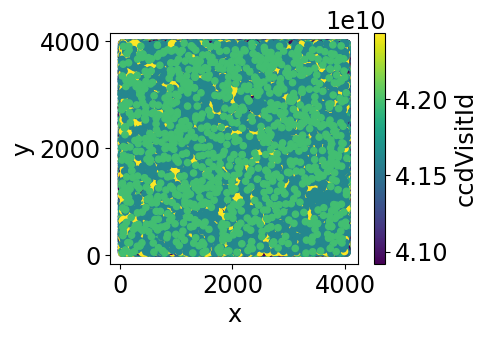

In [12]:
df_sel.plot.scatter('x','y',c='ccdVisitId',colormap='viridis')

<Axes: xlabel='ra', ylabel='dec'>

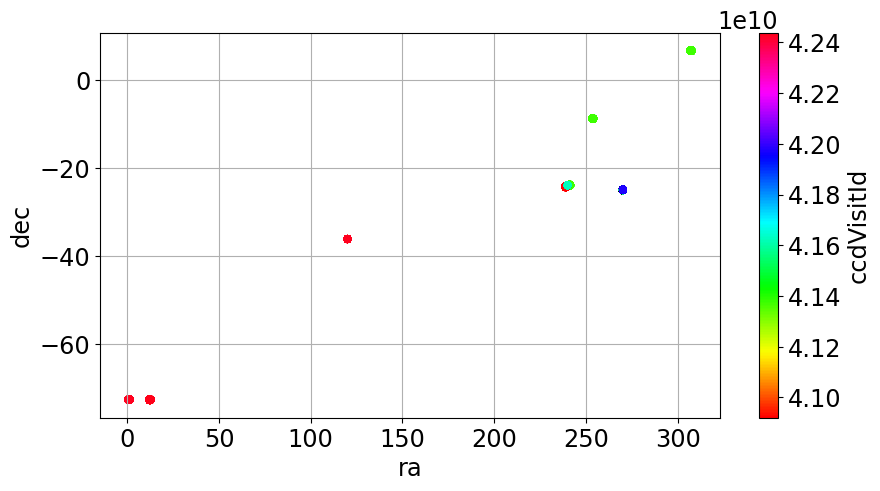

In [13]:
df_sel.plot.scatter('ra','dec',c='ccdVisitId',colormap='hsv',grid=True,figsize=(10,5))

<Axes: xlabel='coord_ra', ylabel='coord_dec'>

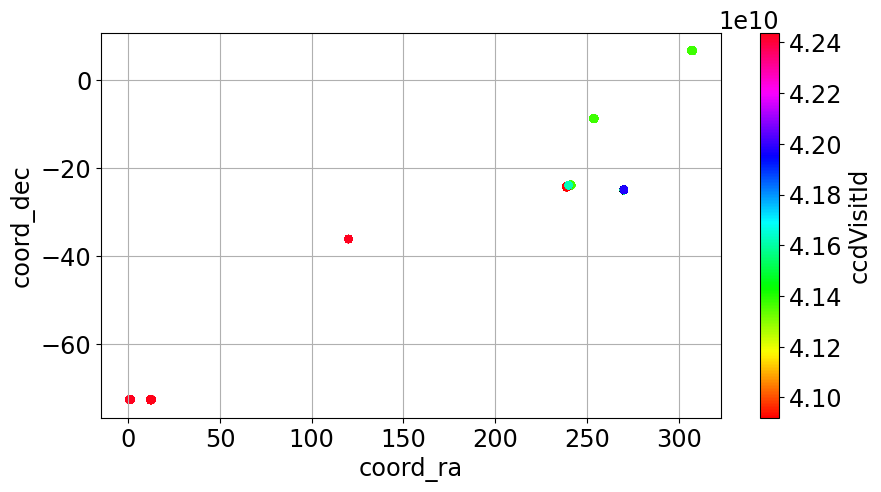

In [14]:
df_sel.plot.scatter('coord_ra','coord_dec',c='ccdVisitId',colormap='hsv',grid=True,figsize=(10,5))

<Axes: title={'center': 'coord_ra'}, ylabel='Frequency'>

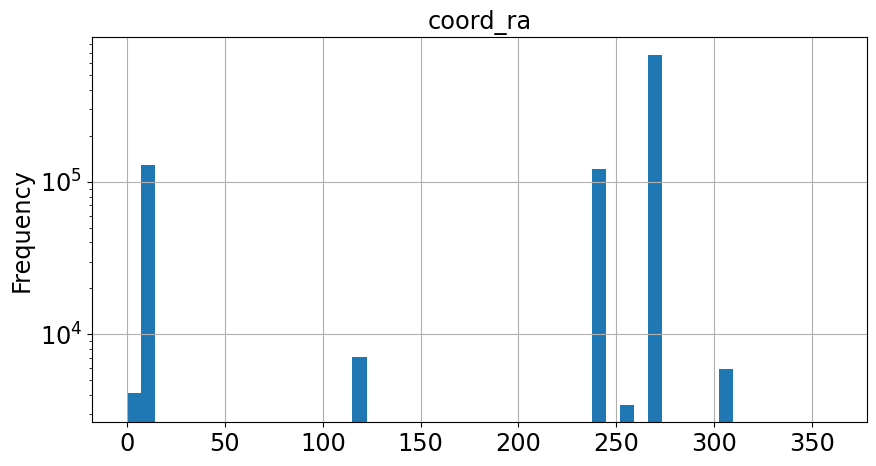

In [15]:
df_sel['coord_ra'].plot(kind="hist",bins=50 ,range=(0,360),logy=True,title="coord_ra",grid=True,figsize=(10,5))

<Axes: title={'center': 'coord_dec'}, ylabel='Frequency'>

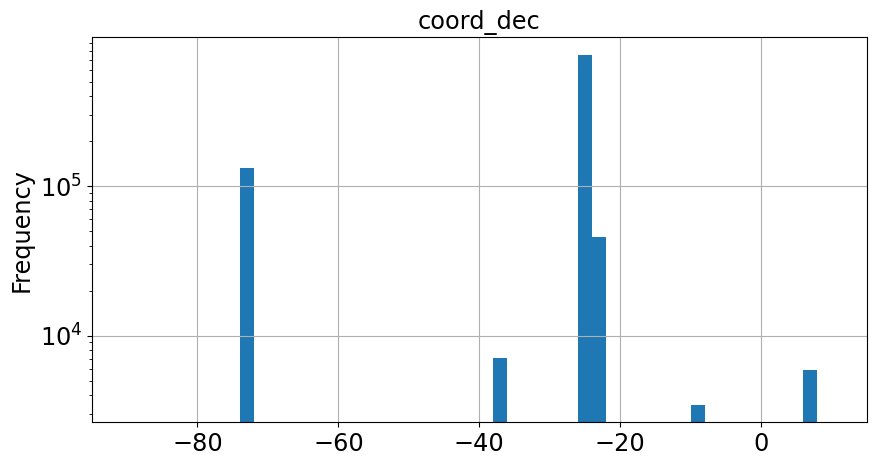

In [16]:
df_sel['coord_dec'].plot(kind="hist",bins=50 ,range=(-90,10),logy=True,title="coord_dec",grid=True,figsize=(10,5))

In [17]:
cut_skyloc = ((df_sel['dec'] < -30) & (df_sel['dec'] > -40) & (df_sel['ra'] > 100) & (df_sel['ra'] < 150))

In [18]:
df_sel = df_sel[cut_skyloc]

<Axes: title={'center': 'psMag'}, ylabel='Frequency'>

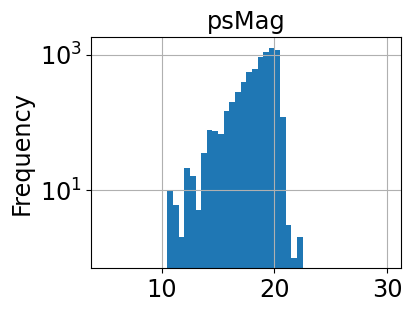

In [19]:
df_sel['psfMag'].plot(kind="hist",bins=50,range=(5,30),logy=True,grid=True,title="psMag")

In [ ]:
df_sel['gaussianMag'].plot(kind="hist",bins=50 ,range=(5,30),logy=True,grid=True,title="gaussianMag")

<Axes: title={'center': 'gaussianMag'}, ylabel='Frequency'>

In [ ]:
df_sel

In [ ]:
#df_sel.groupby(df_sel['dateobs'].dt.date).size().plot()
datetime = pd.to_datetime(df_sel['dateobs'])

In [ ]:
df_sel['dateobs'].max()

In [ ]:
df_sel["date"] = df["dateobs"].astype("datetime64")

In [ ]:
df_sel

In [ ]:
df_time = df_sel[["date"]]

In [ ]:
df_time

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax = (df_time["date"].groupby(df_time["date"].dt.minute)
                         .count()).plot(kind="bar")